In [1]:
import pandas as pd
import glob
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.json import json_normalize
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 200)

In [2]:
print(os.getcwd())

C:\Users\Manshi\Desktop\combine Razorpay


In [3]:
directory = r'C:\Users\Manshi\Desktop\combine Razorpay\\'
csv_files = [file for file in os.listdir(directory) if file.endswith('p.csv')]
csv_files

['April 23 p.csv',
 'Aug 22 p.csv',
 'dec 22 p.csv',
 'feb 23 p.csv',
 'Jan 23 p.csv',
 'july 22 p.csv',
 'june 23 p.csv',
 'march 23 p.csv',
 'may 23 p.csv',
 'Nov 22 p.csv',
 'oct 22 p.csv',
 'sept 22 p.csv']

In [4]:
combined_data = pd.DataFrame()
for files in csv_files:
    data=pd.read_csv(files)
    combined_data = pd.concat([combined_data,data],ignore_index=True)

In [6]:
directory = r'C:\Users\Manshi\Desktop\combine Razorpay\\'
csv_files = [file for file in os.listdir(directory) if file.endswith('orders.csv')]
csv_files

['april 2023 orders.csv',
 'aug 22 orders.csv',
 'dec 2022 orders.csv',
 'feb 2023 orders.csv',
 'jan 23 orders.csv',
 'july 22 orders.csv',
 'march 2023 orders.csv',
 'May 2023 orders.csv',
 'Nov 2022 orders.csv',
 'oct 2022 orders.csv',
 'sept 2022 orders.csv']

In [7]:
orders = pd.DataFrame()
for files in csv_files:
    data=pd.read_csv(files)
    orders = pd.concat([orders,data],ignore_index=True)

In [2]:
# df=pd.read_csv('may 2023.csv')
# orders=pd.read_csv('May orders 2023.csv')

In [9]:
orders.rename(columns={'id':'order_id'},inplace=True)

In [11]:
combined_data

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id
0,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,Watermelon,155.0,1.0,155.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
1,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,MUSKMELON 1PC,135.0,1.0,135.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
2,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,DESI PAPAYA 1PC,100.0,2.0,200.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
3,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,ELAICHI BANANA 1DOZEN,118.0,1.0,118.0,608.0,INR,captured,pay_Lbmp6HExTAkM5g
4,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 20:15:54,order_LbjMO6E1YlnOoF,AVOCADOS 2 PCS,685.0,1.0,685.0,1935.0,INR,failed,pay_LbjMWLqLhpMohI
...,...,...,...,...,...,...,...,...,...,...,...,...
6338,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,Delivery,15.0,1.0,15.0,1685.0,INR,captured,pay_KNZs4UlODcdwbm
6339,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,IMPORTED KIWI BOX,185.0,1.0,185.0,1685.0,INR,captured,pay_KNZs4UlODcdwbm
6340,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",27/09/2022 14:58:38,order_KMsJWoihU7QYy6,PREMIUM JUMBO DATES 500G,815.0,1.0,815.0,815.0,INR,captured,pay_KMsK0vVFivSewT
6341,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",29/09/2022 09:38:03,order_KNZvIoQVGzGL9o,MIX NUTS ROASTED AND SALTED,950.0,1.0,950.0,1510.0,INR,captured,pay_KNZvbmKjqIktA4


In [12]:
orders['name']=orders['notes'].str.split(',').str[0].str.split('"').str[3]
orders['email']=orders['notes'].str.split(',').str[1].str.split('"').str[3]


In [13]:
orders.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at'],inplace=True)

In [14]:
orders

,order_id,name,email
0,order_LYNixREtZ5yK9S,Kanchan,Samtani.kanchan@bcg.com
1,order_LYX61KR1NfQCKT,Sonavi Desai,sonavid@gmail.com
2,order_LYX7VqyBqc61HI,Sonavi Desai,sonavid@gmail.com
3,order_LYXuMMuY5pVnm9,Sonavi Desai,sonavid@gmail.com
4,order_LYnHqGt69fvok7,Meher Mirza,mehermirza123@gmail.com
...,...,...,...
1206,order_KNZrbTnOlpRCNl,Jasma Kapadia,jasmak999@yahoo.com
1207,order_KNZruF53reFCtW,Jasma Kapadia,jasmak999@yahoo.com
1208,order_KNZvIoQVGzGL9o,Amirbanu Virji,ajvirji@gmail.com
1209,order_KNy2q87jB125jD,NaN,NaN


In [15]:
orders.isnull().sum()

order_id     0
name        51
email       51
dtype: int64

In [19]:
combined_data[combined_data['order_id'].isnull()].groupby('item payment amount').sum().reset_index()

,item payment amount,item amount,item quantity,total payment amount
0,0.0,0.0,0.0,0.0


In [21]:
combined_data=pd.merge(combined_data,orders,on='order_id',how="left")

In [22]:
combined_data[combined_data['name'].isnull()]['order_id']

1489                     NaN
2237                     NaN
2822                     NaN
3249    order_LyW1wBiKD3zNrX
3250    order_LyW1wBiKD3zNrX
                ...         
5087    order_Lwys2qrNfCncTf
5099    order_LxjQZeDPofpyQH
5100    order_LxjQZeDPofpyQH
5101    order_LxjQZeDPofpyQH
5102    order_LxjQZeDPofpyQH
Name: order_id, Length: 267, dtype: object

In [23]:
combined_data[combined_data['name'].isnull()]['item payment amount'].sum()

55959.0

In [26]:
combined_data.isnull().sum()

payment page id           0
payment page title        0
payment date              0
order_id                  0
item name                 0
item amount               0
item quantity             0
item payment amount       0
total payment amount      0
currency                  0
payment status            0
payment id                0
name                    261
email                   261
dtype: int64

In [25]:
combined_data.dropna(subset=['order_id'],inplace=True)

In [27]:
combined_data[combined_data['name'].isnull()]

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id,name,email
3249,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,JAMUN 500G,400.0,1.0,400.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
3250,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,AVOCADOS 2 PCS,600.0,1.0,600.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
3251,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,PAPAYA 1PC,100.0,1.0,100.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
3252,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,MUSKMELON 1PC,135.0,1.0,135.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
3253,pl_LxonlA4k4hCi7b,FRUIT BASKET - JUNE 10,06/06/2023 10:10:37,order_LyW1wBiKD3zNrX,DELIVERY,15.0,1.0,15.0,1250.0,INR,captured,pay_LyW280F25GQytS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,02/06/2023 13:05:14,order_Lwys2qrNfCncTf,HAPUS MANGOES 1DOZ,950.0,1.0,950.0,2295.0,INR,captured,pay_Lwys6fwwkJg9Ij,NaN,NaN
5099,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,MOSUMBI LOCAL 1kg,165.0,1.0,165.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN
5100,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,KIWI BOX,200.0,1.0,200.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN
5101,pl_Lw77t4FZvxried,FRUIT BASKET - JUNE3,04/06/2023 10:37:54,order_LxjQZeDPofpyQH,BLUEBERRIES 2 BOX,550.0,1.0,550.0,930.0,INR,captured,pay_LxjQigbGWf4sMa,NaN,NaN


In [28]:
combined_data.rename(columns={'item payment amount':'item payment amount(INR) '},inplace=True)


In [29]:
combined_data_copy=combined_data.copy()

In [30]:
combined_data_copy.tail()

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,payment id,name,email
6338,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,Delivery,15.0,1.0,15.0,1685.0,INR,captured,pay_KNZs4UlODcdwbm,Jasma Kapadia,jasmak999@yahoo.com
6339,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,IMPORTED KIWI BOX,185.0,1.0,185.0,1685.0,INR,captured,pay_KNZs4UlODcdwbm,Jasma Kapadia,jasmak999@yahoo.com
6340,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",27/09/2022 14:58:38,order_KMsJWoihU7QYy6,PREMIUM JUMBO DATES 500G,815.0,1.0,815.0,815.0,INR,captured,pay_KMsK0vVFivSewT,Leena Sivakumar,leena.sivakumar@gmail.com
6341,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",29/09/2022 09:38:03,order_KNZvIoQVGzGL9o,MIX NUTS ROASTED AND SALTED,950.0,1.0,950.0,1510.0,INR,captured,pay_KNZvbmKjqIktA4,Amirbanu Virji,ajvirji@gmail.com
6342,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",29/09/2022 09:38:03,order_KNZvIoQVGzGL9o,BRAZIL NUTS 200G,560.0,1.0,560.0,1510.0,INR,captured,pay_KNZvbmKjqIktA4,Amirbanu Virji,ajvirji@gmail.com


### checking unique values and their count in each columns

In [31]:
combined_data_copy['payment page id'].nunique()

187

In [32]:
combined_data_copy['payment page id'].value_counts()

pl_JwhO3HTiMTVyHX    123
pl_LjSEzj8c6pW6eg     92
pl_LgPq1hiWfh7uZE     88
pl_KGSvSXU36ZVMir     86
pl_K5QoMWpw63vMtn     86
                    ... 
pl_KteK7pELT57gIt      2
pl_KqX6FyOFgY4VZb      2
pl_M1Nv8PzDD98HbR      1
pl_LB4JApucSL4NEl      1
pl_KSVvJdQdjUzF8N      1
Name: payment page id, Length: 187, dtype: int64

In [33]:
combined_data_copy['payment page title'].nunique()

164

In [34]:
combined_data_copy['payment page title'].value_counts()

FRUIT BASKET AUGUST                        232
FRUIT BASKET JULY                          152
FRUIT BASKET OCTOBER                       139
FRUIT BASKET DAILY                         115
FRUIT BASKET DAILY SEPTEMBER               108
                                          ... 
HERBS & SALADS MARCH 25                      2
SALADS, EXOTIC VEGETABLES DEC 20             2
MALAWI MANGO MANIA                           2
DRYFRUITS, SEEDS, NUTS FEBRUARY 08           1
DRYFRUITS, SEEDS, NUTS. JUNE 14th-18 th      1
Name: payment page title, Length: 164, dtype: int64

In [35]:
combined_data_copy['order_id'].nunique()

1088

In [36]:
combined_data_copy['payment id'].nunique()

1177

In [37]:
df=combined_data_copy.groupby('order_id')['payment id'].first().reset_index()
combined_data_copy=pd.merge(combined_data_copy,df,on='order_id',how="left")

In [38]:
combined_data_copy['payment id']=combined_data_copy['payment id_y']
combined_data_copy.drop(columns=['payment id_x','payment id_y'],inplace=True)

In [39]:
combined_data_copy

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,name,email,payment id
0,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,Watermelon,155.0,1.0,155.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
1,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,MUSKMELON 1PC,135.0,1.0,135.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
2,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,DESI PAPAYA 1PC,100.0,2.0,200.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
3,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 23:39:04,order_Lbmout4V0g7BjF,ELAICHI BANANA 1DOZEN,118.0,1.0,118.0,608.0,INR,captured,Parul kumar,2014parulkumar@gmail.com,pay_Lbmp6HExTAkM5g
4,pl_La3sRsT9Tonx59,FRUIT BASKET APRIL 10,09/04/2023 20:15:54,order_LbjMO6E1YlnOoF,AVOCADOS 2 PCS,685.0,1.0,685.0,1935.0,INR,failed,Nisha singh,anish24@gmail.com,pay_LbjMWLqLhpMohI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6332,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,Delivery,15.0,1.0,15.0,1685.0,INR,captured,Jasma Kapadia,jasmak999@yahoo.com,pay_KNZs4UlODcdwbm
6333,pl_KLb4g8XBKzDjn6,FRUIT BASKET DAILY SEPTEMBER,29/09/2022 09:34:44,order_KNZruF53reFCtW,IMPORTED KIWI BOX,185.0,1.0,185.0,1685.0,INR,captured,Jasma Kapadia,jasmak999@yahoo.com,pay_KNZs4UlODcdwbm
6334,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",27/09/2022 14:58:38,order_KMsJWoihU7QYy6,PREMIUM JUMBO DATES 500G,815.0,1.0,815.0,815.0,INR,captured,Leena Sivakumar,leena.sivakumar@gmail.com,pay_KMsK0vVFivSewT
6335,pl_KLb5bJA1tqXWul,"DRYFRUITS, SEEDS, NUTS SEPTEMBER",29/09/2022 09:38:03,order_KNZvIoQVGzGL9o,MIX NUTS ROASTED AND SALTED,950.0,1.0,950.0,1510.0,INR,captured,Amirbanu Virji,ajvirji@gmail.com,pay_KNZvbmKjqIktA4


In [27]:
# values_to_drop = ['pay_LUqE7lVkgOU9bH','pay_LUvsd49Yc5Itaz','pay_LXE2GgLFFZUL3l','pay_LZJWgSvAQc1gCS','pay_LZxtNQumNMNGY3','pay_LZxtUuQsPr4hEh']

# # Drop rows where Gender column has values in the list
# combined_data_copy = combined_data_copy[~combined_data_copy['payment id'].isin(values_to_drop)]

In [40]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
df[df['payment id']>1]



,order_id,payment id


In [41]:
combined_data_copy['item name'].unique()

array(['Watermelon', 'MUSKMELON 1PC', 'DESI PAPAYA 1PC',
       'ELAICHI BANANA 1DOZEN', 'AVOCADOS 2 PCS', 'HAPUS MANGOES 1DOZ',
       'FLAME RED GRAPES 1 KG', 'KIWI BOX', 'FIJI APPLES 1KG',
       'POMEGRANATE 1KG', 'PAIREE MANGOES 1 DOZ', 'CHICKOO 1KG',
       'REGULAR BANANA 1 DOZ', 'BLUEBERRIES 2 BOX', 'PEAR 1KG',
       'MOSUMBI LOCAL 1kg', 'MANDARIN MINI ORANGES 1KG',
       'RED YELLOW CAPSICUM 1PC', 'S LETTUCE MIX', 'PURPLE CABBAGE 1 PC',
       'DELIVERY', 'S ROMAINE', 'S SUMMERCRISP', 'ICEBERG LETTUCE 1 PC',
       'S BUTTERHEAD', 'JAPANESE CUCUMBER 500G', 'S ARAGULA',
       'BABY SPINACH', 'BUTTON WHITE MUSHROOM 2PACKS', 'BROCCOLI 1PC',
       'GREEN ZUCCHINI 1PC', 'YELLOW ZUCCHINI 1PC', 'Sweet Potato 500g',
       'Green Capsicum 500g', 'Ladies Finger 250g', 'Potatoes 1kg',
       'Cucumber White 500g', 'Dudhi', 'Cauliflower', 'French Beans 500g',
       'Drumsticks 250g', 'Cabbage', 'Tomatoes 1kg', 'Onions 1kg',
       'Brinjal Stripes Kateri 500g', 'Tendli 500g', 'Gavar

In [42]:
combined_data_copy['item name'].nunique()

218

In [43]:
combined_data_copy['name'].nunique()

238

In [44]:
combined_data_copy['payment status'].nunique()

2

In [45]:
combined_data_copy['payment status'].value_counts()

captured    4332
failed      2005
Name: payment status, dtype: int64

In [46]:
combined_data_copy.fillna('unknown',inplace=True)

In [47]:
combined_data_copy['name'].nunique()

239

In [48]:
combined_data_copy['email'].nunique()

126

In [49]:
combined_data_copy['name'].value_counts()

Indrani Jafar        444
Michelle Baptist     379
unknown              261
kanchan              244
Ruchi  Wahi          202
                    ... 
Puja                   1
Rachna Chattaram       1
Preeti Maria           1
Minu Agarwql           1
Viji Ram               1
Name: name, Length: 239, dtype: int64

In [50]:
combined_data_copy['currency'].value_counts()

INR    6337
Name: currency, dtype: int64

#### cheching null value count

In [51]:
combined_data_copy.isnull().sum()

payment page id              0
payment page title           0
payment date                 0
order_id                     0
item name                    0
item amount                  0
item quantity                0
item payment amount(INR)     0
total payment amount         0
currency                     0
payment status               0
name                         0
email                        0
payment id                   0
dtype: int64

#### Droping apartment-no ,apartment and currency column

In [52]:
combined_data_copy.drop(columns=['currency'],inplace=True)

In [53]:
(combined_data_copy['payment status'].value_counts()/len(combined_data_copy))*100

captured    68.360423
failed      31.639577
Name: payment status, dtype: float64

In [54]:
combined_data_payment_completed=combined_data_copy

we can drop payment page id column and seggregte titles of item

In [55]:
combined_data_payment_completed.drop(columns=['payment page id'],inplace=True)

In [56]:
#removing payment id as we can get the desired information from orderid
combined_data_payment_completed.drop(columns=['payment id'],inplace=True)

In [57]:
combined_data_payment_completed[combined_data_payment_completed['name']=='unknown']['order_id'].nunique()

46

In [58]:
#removing status as we only have successful payments now
combined_data_payment_completed.drop(columns=['payment status'],inplace=True)

In [59]:
dryfruits=combined_data_payment_completed['payment page title'].str.startswith('DRYFRUITS, SEEDS, NUTS')
combined_data_payment_completed.loc[dryfruits,'payment page title']='DRYFRUITS, SEEDS, NUTS'

fruits=combined_data_payment_completed['payment page title'].str.startswith('FRUIT BASKET')
combined_data_payment_completed.loc[fruits,'payment page title']='FRUIT BASKET'

exotic_vegies=combined_data_payment_completed['payment page title'].str.startswith('SALADS, EXOTIC VEGETABLES')
combined_data_payment_completed.loc[exotic_vegies,'payment page title']='SALADS, EXOTIC VEGETABLES'

vegies=combined_data_payment_completed['payment page title'].str.startswith('FORM')
combined_data_payment_completed.loc[vegies,'payment page title']='VEGETABLES'

herbs=combined_data_payment_completed['payment page title'].str.startswith('HERBS & SALADS')
combined_data_payment_completed.loc[herbs,'payment page title']='HERBS & SALADS'

In [60]:
#seggregating payment page title
combined_data_payment_completed['payment page title'].value_counts()


FRUIT BASKET                    2791
SALADS, EXOTIC VEGETABLES       1770
VEGETABLES                      1195
DRYFRUITS, SEEDS, NUTS           535
DAILY FRUIT BASKET OCTOBER        19
HERBS & SALADS                    13
SUMMER LEAFY COOLING FOODS         8
WEEKEND MIX FRUITS & EXOTICS       4
MALAWI MANGO MANIA                 2
Name: payment page title, dtype: int64

In [61]:
combined_data_payment_completed.columns

Index(['payment page title', 'payment date', 'order_id', 'item name',
       'item amount', 'item quantity', 'item payment amount(INR) ',
       'total payment amount', 'name', 'email'],
      dtype='object')

In [62]:

combined_data_payment_completed['payment date']=combined_data_payment_completed['payment date'].astype(str)


In [63]:
combined_data_payment_completed['date']=combined_data_payment_completed['payment date'].str.split().str[0]

In [64]:
combined_data_payment_completed['time']=combined_data_payment_completed['payment date'].str.split().str[1]

In [65]:
combined_data_payment_completed['year']=combined_data_payment_completed['date'].str.split('/').str[2].astype(int)
combined_data_payment_completed['day']=combined_data_payment_completed['date'].str.split('/').str[0].astype(int)
combined_data_payment_completed['month']=combined_data_payment_completed['date'].str.split('/').str[1].astype(int)

In [66]:
combined_data_payment_completed['date'] = pd.to_datetime(combined_data_payment_completed[['year', 'month', 'day']])


In [67]:
combined_data_payment_completed['name'] = combined_data_payment_completed['name'].str.strip().str.lower()

In [68]:
combined_data_payment_completed['item name'] = combined_data_payment_completed['item name'].str.strip().str.lower()
combined_data_payment_completed['email'] = combined_data_payment_completed['email'].str.strip().str.lower()

In [73]:
print("number of days for which we are performing our analysis")
combined_data_payment_completed['date'].min()

number of days for which we are performing our analysis


Timestamp('2022-12-02 00:00:00')

In [71]:
combined_data_payment_completed=combined_data_payment_completed[combined_data_payment_completed['date']<'2023-01-01']
combined_data_payment_completed=combined_data_payment_completed[combined_data_payment_completed['date']>'2022-11-30']

In [92]:
df = combined_data_payment_completed
df_grouped = df.groupby('name')['email'].first().reset_index()
df_grouped = df_grouped.sort_values(by="name", ascending=True)




display(df_grouped)


,name,email
0,abha mehta,abhamehta26@gmail.com
1,amirbanu virji,ajvirji@gmail.com
2,anindita guha maulik rungta,guhamaulik@hotmail.com
3,anubha,sawhney.anubha@gmail.com
4,aparna jain,aparna.mj@gmail.com
5,brinda upadhyaya,ashaforanimal@gmail.com
6,chandrika siddharth,anish24@gmail.com
7,dinmeher bunshah,manishapradip19@gmail.com
8,gitanjali anand,gma6567@gmail.com
9,indrani jafar,ani.doley@gmail.com


In [76]:
row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'puja'].index

# Update the value of the 'Email' column in the specified row
combined_data_payment_completed.loc[row_index, 'name'] = 'pooja sharma'

In [52]:
# merged_df = pd.merge(combined_data_payment_completed,df_grouped, on='email', how='left')
# merged_df['name_x'].update(merged_df['name_y'])

# merged_df['name']=merged_df['name_x']

# combined_data_payment_completed=merged_df.drop(columns=['name_x','name_y'])

In [78]:
combined_data_payment_completed.groupby('name')['email'].unique().reset_index()

,name,email
0,abha mehta,[abhamehta26@gmail.com]
1,amirbanu virji,[ajvirji@gmail.com]
2,anindita guha maulik rungta,[guhamaulik@hotmail.com]
3,anubha,[sawhney.anubha@gmail.com]
4,aparna jain,[aparna.mj@gmail.com]
5,brinda upadhyaya,[ashaforanimal@gmail.com]
6,chandrika siddharth,[anish24@gmail.com]
7,dinmeher bunshah,[manishapradip19@gmail.com]
8,gitanjali anand,[gma6567@gmail.com]
9,indrani jafar,"[ani.doley@gmail.com, manishapradip19@gmail.com]"


In [80]:
print("Total number of item bought by individuals")
combined_data_payment_completed['name'].value_counts().reset_index(name='number of item purchased(not unique)')

Total number of item bought by individuals


,index,number of item purchased(not unique)
0,meher mirza,30
1,naina,28
2,jasma kapadia,22
3,indrani jafar,21
4,ushma,19
5,parul kumar,17
6,kanchan,17
7,michelle baptist,14
8,sonavi desai,13
9,shivali sharma,11


In [81]:
categories=combined_data_payment_completed['payment page title'].unique()
categories_sales=dict()
for category in categories:
    categories_sales[category]=combined_data_payment_completed[combined_data_payment_completed['payment page title']==category]['item payment amount(INR) '].sum()

df = pd.DataFrame(categories_sales.items(), columns=["Category Name", "Amount"])
df_sorted = df.sort_values(by="Amount", ascending=False)
display(df_sorted)
 

,Category Name,Amount
0,FRUIT BASKET,46280.0
2,"DRYFRUITS, SEEDS, NUTS",31895.0
1,"SALADS, EXOTIC VEGETABLES",8990.0
3,MALAWI MANGO MANIA,3715.0


In [83]:
items_amount=combined_data_payment_completed.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
items_amount.sort_values(by='item payment amount(INR) ', ascending=False)

,item name,item payment amount(INR),item quantity
56,walnuts 500g,8085.0,7.0
54,strawberries 1 box,7920.0,30.0
5,blueberries 2 box,7200.0,12.0
0,a2 gir cow ghee 500ml,6300.0,6.0
34,new zealand queen apples 1kg,3900.0,10.0
33,nagpur oranges 1kg,3770.0,26.0
27,malawi mangoes 15 pc box,3700.0,1.0
38,pomegranate 1kg,3500.0,10.0
1,avocados 2 pcs,3100.0,5.0
39,premium almonds 500g,2700.0,3.0


In [84]:
combined_data_payment_completed[combined_data_payment_completed['date']<'2023-05-06'].groupby('item name')['item payment amount(INR) '].sum().reset_index()

,item name,item payment amount(INR)
0,a2 gir cow ghee 500ml,6300.0
1,avocados 2 pcs,3100.0
2,baby spinach,550.0
3,babycorn 1pack,195.0
4,beauty pear 1kg,1500.0
5,blueberries 2 box,7200.0
6,broccoli 1pc,870.0
7,button white mushroom 2packs,280.0
8,cashews 500g,2460.0
9,celery 250g,70.0


In [86]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=False)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_most_recent = df_unique[['name', 'email', 'date']].rename(columns={'date': 'Most_recent_Purchase_date'})
current_date=combined_data_payment_completed['date'].max()
# Print the resulting DataFrame
df_most_recent['Number of days after Purchase']=current_date-df_most_recent['Most_recent_Purchase_date']
df_most_recent=df_most_recent.reset_index()
df_most_recent.drop(columns='index')

,name,email,Most_recent_Purchase_date,Number of days after Purchase
0,kanchan,samtani.kanchan@bcg.com,2022-12-29,0 days
1,ushma,ushmasheth@gmail.com,2022-12-29,0 days
2,michelle baptist,michbaptist@gmail.com,2022-12-29,0 days
3,jasma kapadia,jasmak999@yahoo.com,2022-12-29,0 days
4,amirbanu virji,ajvirji@gmail.com,2022-12-29,0 days
5,gitanjali anand,gma6567@gmail.com,2022-12-28,1 days
6,anubha,sawhney.anubha@gmail.com,2022-12-27,2 days
7,meher mirza,mehermirza123@gmail.com,2022-12-26,3 days
8,abha mehta,abhamehta26@gmail.com,2022-12-26,3 days
9,smita dalal,dalalsmita@yahoo.co.in,2022-12-26,3 days


Text(0.5, 1.0, 'Customers most recent purchase by Date')

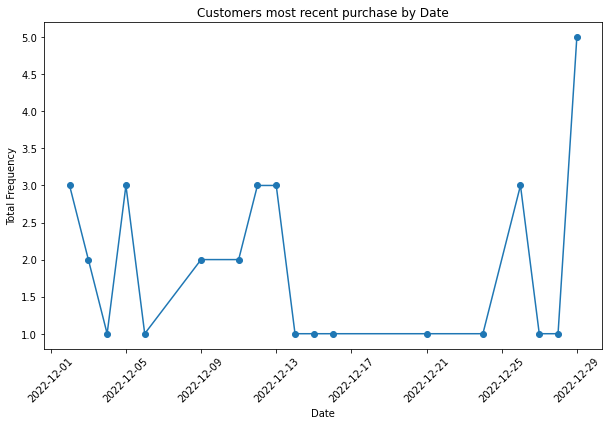

In [87]:
df_freq=df_most_recent.groupby('Most_recent_Purchase_date')['name'].size().reset_index()
# Create a scatter plot or line plot
plt.figure(figsize=(10, 6)) 

# Line plot
plt.plot(df_freq['Most_recent_Purchase_date'], df_freq['name'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Frequency')
plt.xticks(rotation=45)
plt.title('Customers most recent purchase by Date')

In [88]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=True)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_oldest_date = df_unique[['name', 'email', 'date']].rename(columns={'date': 'oldest_Purchase_date'})
# Print the resulting DataFrame

df_oldest_date=df_oldest_date.reset_index()
df_oldest_date.drop(columns='index')

,name,email,oldest_Purchase_date
0,tannaz,anish24@gmail.com,2022-12-02
1,sonavi desai,sonavid@gmail.com,2022-12-02
2,shivali sharma,skhungar@hotmail.com,2022-12-02
3,anindita guha maulik rungta,guhamaulik@hotmail.com,2022-12-02
4,jaya prasad,anish24@gmail.com,2022-12-03
5,nirja k,anish24@gmail.com,2022-12-03
6,aparna jain,aparna.mj@gmail.com,2022-12-04
7,shwetha kallaje,shwethakallaje@gmail.com,2022-12-05
8,parul kumar,2014parkumar@gmail.com,2022-12-05
9,dinmeher bunshah,manishapradip19@gmail.com,2022-12-05


In [89]:
name_amount=combined_data_payment_completed.groupby('name')['item payment amount(INR) '].sum().reset_index()
name_amount=name_amount.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
name_amount.drop(columns='index',inplace=True)
name_amount.head(10)

,name,item payment amount(INR)
0,nirja k,9475.0
1,jasma kapadia,7480.0
2,yogesh thakkar,6360.0
3,naina,5163.0
4,ushma,4951.0
5,parul kumar,4846.0
6,chandrika siddharth,4110.0
7,nisha singh,3715.0
8,kanchan,3466.0
9,shivali sharma,3310.0


In [94]:
# Group data by 'name' and calculate the number of unique dates for each group
unique_days = combined_data_payment_completed.groupby('name')['date'].nunique().reset_index()

# Rename the column to 'unique_days'
unique_days=unique_days.sort_values(by='date',ascending=False)

unique_days = unique_days.rename(columns={'date': 'Number of times ordered this month','name':'Customer Name'})



unique_days


,Customer Name,Number of times ordered this month
10,jasma kapadia,6
20,parul kumar,4
33,ushma,3
16,naina,3
15,michelle baptist,3
12,kanchan,3
0,abha mehta,2
1,amirbanu virji,2
14,meher mirza,2
21,pooja sharma,2


In [95]:
df_sorted_amount=name_amount.sort_values(by='name')

df_sorted_amount = df_sorted_amount.rename(columns={'name':'Customer Name'})

unique_days=unique_days.sort_values(by='Customer Name')

merged_df = pd.merge(unique_days,df_sorted_amount, on='Customer Name', how='left')

merged_df['amount per order']=merged_df['item payment amount(INR) ']//merged_df['Number of times ordered this month']
df=merged_df.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
df.drop(columns='index',inplace=True)
df

,Customer Name,Number of times ordered this month,item payment amount(INR),amount per order
0,nirja k,1,9475.0,9475.0
1,jasma kapadia,6,7480.0,1246.0
2,yogesh thakkar,1,6360.0,6360.0
3,naina,3,5163.0,1721.0
4,ushma,3,4951.0,1650.0
5,parul kumar,4,4846.0,1211.0
6,chandrika siddharth,1,4110.0,4110.0
7,nisha singh,1,3715.0,3715.0
8,kanchan,3,3466.0,1155.0
9,shivali sharma,1,3310.0,3310.0


In [96]:
top_customer=df.head(10)

top_customer_name=top_customer['Customer Name'].unique()

top_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(top_customer_name)]
top_customer_detail_grouped=top_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
top_customer_detail_grouped

,name,payment page title,item payment amount(INR)
0,chandrika siddharth,"DRYFRUITS, SEEDS, NUTS",4110.0
1,jasma kapadia,"DRYFRUITS, SEEDS, NUTS",3180.0
2,jasma kapadia,FRUIT BASKET,4300.0
3,kanchan,FRUIT BASKET,3466.0
4,naina,FRUIT BASKET,3703.0
5,naina,"SALADS, EXOTIC VEGETABLES",1460.0
6,nirja k,"DRYFRUITS, SEEDS, NUTS",9475.0
7,nisha singh,MALAWI MANGO MANIA,3715.0
8,parul kumar,"DRYFRUITS, SEEDS, NUTS",2750.0
9,parul kumar,FRUIT BASKET,1711.0


In [98]:
pivot_table = pd.pivot_table(top_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# Rename the columns
pivot_table.columns = ['DRYFRUITS, SEEDS, NUTS', 'FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','MALAWI MANGO MANIA']

# Reset the index
pivot_table.reset_index(inplace=True)
pivot_table.fillna(0,inplace=True)
pivot_table['Total Amount(INR) '] = pivot_table['DRYFRUITS, SEEDS, NUTS']+pivot_table['MALAWI MANGO MANIA']+pivot_table['FRUIT BASKET']+pivot_table['SALADS, EXOTIC VEGETABLES']
pivot_table=pivot_table.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
pivot_table.drop(columns='index',inplace=True)
pivot_table

,name,"DRYFRUITS, SEEDS, NUTS",FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",MALAWI MANGO MANIA,Total Amount(INR)
0,nirja k,9475.0,0.0,0.0,0.0,9475.0
1,jasma kapadia,3180.0,4300.0,0.0,0.0,7480.0
2,yogesh thakkar,6360.0,0.0,0.0,0.0,6360.0
3,naina,0.0,3703.0,0.0,1460.0,5163.0
4,ushma,0.0,4951.0,0.0,0.0,4951.0
5,parul kumar,2750.0,1711.0,0.0,385.0,4846.0
6,chandrika siddharth,4110.0,0.0,0.0,0.0,4110.0
7,nisha singh,0.0,0.0,3715.0,0.0,3715.0
8,kanchan,0.0,3466.0,0.0,0.0,3466.0
9,shivali sharma,0.0,3310.0,0.0,0.0,3310.0


In [100]:
pivot_table_p=pivot_table
pivot_table_p['FRUIT BASKET(percentage) ']=round(pivot_table_p['FRUIT BASKET']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['DRYFRUITS, SEEDS, NUTS(percentage) ']=round(pivot_table_p['DRYFRUITS, SEEDS, NUTS']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['SALADS, EXOTIC VEGETABLES(percentage) ']=round(pivot_table_p['SALADS, EXOTIC VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['MALAWI MANGO MANIA(percentage) ']=round(pivot_table_p['MALAWI MANGO MANIA']*100/pivot_table_p['Total Amount(INR) '],2)

#pivot_table_p['HERBS & SALADS(percentage) ']=round(pivot_table_p['HERBS & SALADS']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p.drop(columns=['DRYFRUITS, SEEDS, NUTS','FRUIT BASKET','SALADS, EXOTIC VEGETABLES','MALAWI MANGO MANIA'],inplace=True)
pivot_table_p

,name,Total Amount(INR),FRUIT BASKET(percentage),"DRYFRUITS, SEEDS, NUTS(percentage)","SALADS, EXOTIC VEGETABLES(percentage)",MALAWI MANGO MANIA(percentage)
0,nirja k,9475.0,0.00,100.00,0.0,0.00
1,jasma kapadia,7480.0,57.49,42.51,0.0,0.00
2,yogesh thakkar,6360.0,0.00,100.00,0.0,0.00
3,naina,5163.0,71.72,0.00,0.0,28.28
4,ushma,4951.0,100.00,0.00,0.0,0.00
5,parul kumar,4846.0,35.31,56.75,0.0,7.94
6,chandrika siddharth,4110.0,0.00,100.00,0.0,0.00
7,nisha singh,3715.0,0.00,0.00,100.0,0.00
8,kanchan,3466.0,100.00,0.00,0.0,0.00
9,shivali sharma,3310.0,100.00,0.00,0.0,0.00


In [108]:
# bottom_customer=df.tail(10)

# bottom_customer_name=bottom_customer['Customer Name'].unique()

# bottom_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(bottom_customer_name)]
# bottom_customer_detail_grouped=bottom_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
# bottom_customer_detail_grouped
# pivot_table_bottom = pd.pivot_table(bottom_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# # # Rename the columns
# pivot_table_bottom.columns = ['FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','VEGETABLES','HERBS & SALADS']

# # Reset the index
# pivot_table_bottom.reset_index(inplace=True)
# pivot_table_bottom.fillna(0,inplace=True)
# pivot_table_bottom['Total Amount(INR) '] = pivot_table_bottom['FRUIT BASKET']+pivot_table_bottom['VEGETABLES']+pivot_table_bottom['SALADS, EXOTIC VEGETABLES']+pivot_table_bottom['HERBS & SALADS']
# pivot_table_bottom=pivot_table_bottom.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
# pivot_table_bottom.drop(columns='index',inplace=True)
# pivot_table_bottom

In [101]:
top_customer_detail.groupby('name')['item name'].unique().reset_index()

,name,item name
0,chandrika siddharth,"[walnuts 500g, premium almonds 500g]"
1,jasma kapadia,"[imported kiwi box, blueberries 2 box, delivery, new zealand red apples 1kg, nagpur oranges 1kg, turkish apricot 200g, makhana 250g, salted pista 500g, prunes 250g, strawberries 1 box, new zealand..."
2,kanchan,"[elaichi banana 1dozen, imported kiwi box, pomegranate 1kg, delivery, strawberries 1 box, nagpur oranges 1kg, red grapes 500g, muskmelon 1pc, beauty pear 1kg, new zealand queen apples 1kg]"
3,naina,"[babycorn 1pack, celery 250g, avocados 2 pcs, red yellow capsicum 1pc, button white mushroom 2packs, broccoli 1pc, cherry tomatoes 250g, italian basil, baby spinach, delivery, mosumbi local 1kg, r..."
4,nirja k,"[honey awla 500g, makhana 250g, premium jumbo dates 500g, cashews 500g, premium almonds 500g, walnuts 500g, mamra badam 500g, jumbo anjeer 500g, a2 gir cow ghee 500ml, turkish apricot 200g, golden..."
5,nisha singh,"[malawi mangoes 15 pc box, delivery]"
6,parul kumar,"[yellow zucchini 1pc, delivery, babycorn 1pack, green zucchini 1pc, broccoli 1pc, elaichi banana 1dozen, desi papaya 1pc, makhana 250g, a2 gir cow ghee 500ml, new zealand queen apples 1kg, beauty ..."
7,shivali sharma,"[mosumbi local 1kg, pomegranate 1kg, red grapes 500g, muskmelon 1pc, desi papaya 1pc, nagpur oranges 1kg, strawberries 1 box, raipur guava 1kg, avocados 2 pcs, blueberries 2 box, delivery]"
8,ushma,"[new zealand red apples 1kg, delivery, raipur guava 1kg, elaichi banana 1dozen, blueberries 2 box, nagpur oranges 1kg, strawberries 1 box, new zealand queen apples 1kg, desi papaya 1pc, red grapes..."
9,yogesh thakkar,"[golden rasins 500g, walnuts 500g, gourmet black rasins 500g, a2 gir cow ghee 500ml, cashews 500g, honey awla 500g]"


In [102]:
top1=top_customer_detail.groupby('name')['item name'].unique().reset_index()
top2=top_customer_detail.groupby('name')['item payment amount(INR) '].sum().reset_index()
merged=pd.merge(top1,top2,on='name',how='left')
merged=merged.sort_values(by="item payment amount(INR) ",ascending=False).reset_index()
merged.drop(columns='index')

,name,item name,item payment amount(INR)
0,nirja k,"[honey awla 500g, makhana 250g, premium jumbo dates 500g, cashews 500g, premium almonds 500g, walnuts 500g, mamra badam 500g, jumbo anjeer 500g, a2 gir cow ghee 500ml, turkish apricot 200g, golden...",9475.0
1,jasma kapadia,"[imported kiwi box, blueberries 2 box, delivery, new zealand red apples 1kg, nagpur oranges 1kg, turkish apricot 200g, makhana 250g, salted pista 500g, prunes 250g, strawberries 1 box, new zealand...",7480.0
2,yogesh thakkar,"[golden rasins 500g, walnuts 500g, gourmet black rasins 500g, a2 gir cow ghee 500ml, cashews 500g, honey awla 500g]",6360.0
3,naina,"[babycorn 1pack, celery 250g, avocados 2 pcs, red yellow capsicum 1pc, button white mushroom 2packs, broccoli 1pc, cherry tomatoes 250g, italian basil, baby spinach, delivery, mosumbi local 1kg, r...",5163.0
4,ushma,"[new zealand red apples 1kg, delivery, raipur guava 1kg, elaichi banana 1dozen, blueberries 2 box, nagpur oranges 1kg, strawberries 1 box, new zealand queen apples 1kg, desi papaya 1pc, red grapes...",4951.0
5,parul kumar,"[yellow zucchini 1pc, delivery, babycorn 1pack, green zucchini 1pc, broccoli 1pc, elaichi banana 1dozen, desi papaya 1pc, makhana 250g, a2 gir cow ghee 500ml, new zealand queen apples 1kg, beauty ...",4846.0
6,chandrika siddharth,"[walnuts 500g, premium almonds 500g]",4110.0
7,nisha singh,"[malawi mangoes 15 pc box, delivery]",3715.0
8,kanchan,"[elaichi banana 1dozen, imported kiwi box, pomegranate 1kg, delivery, strawberries 1 box, nagpur oranges 1kg, red grapes 500g, muskmelon 1pc, beauty pear 1kg, new zealand queen apples 1kg]",3466.0
9,shivali sharma,"[mosumbi local 1kg, pomegranate 1kg, red grapes 500g, muskmelon 1pc, desi papaya 1pc, nagpur oranges 1kg, strawberries 1 box, raipur guava 1kg, avocados 2 pcs, blueberries 2 box, delivery]",3310.0


In [104]:
detail_item=top_customer_detail[top_customer_detail['name']=='nirja k'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,mamra badam 500g,1780.0,1.0
1,walnuts 500g,1155.0,1.0
2,a2 gir cow ghee 500ml,1050.0,1.0
3,golden rasins 500g,1000.0,2.0
4,jumbo anjeer 500g,990.0,1.0
5,premium almonds 500g,900.0,1.0
6,cashews 500g,820.0,1.0
7,premium jumbo dates 500g,815.0,1.0
8,honey awla 500g,360.0,1.0
9,makhana 250g,325.0,1.0


In [93]:
detail_item=top_customer_detail[top_customer_detail['name']=='jasma kapadia'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,premium jumbo dates 500g,4890.0,6.0
1,walnuts 500g,3465.0,3.0
2,a2 gir cow ghee 500ml,3150.0,3.0
3,premium almonds 500g,2700.0,3.0
4,pumpkin seeds 250g,945.0,3.0
5,turkish apricot 200g,870.0,3.0


In [105]:
detail_item=top_customer_detail[top_customer_detail['name']=='yogesh thakkar'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2.0
1,cashews 500g,1640.0,2.0
2,a2 gir cow ghee 500ml,1050.0,1.0
3,golden rasins 500g,500.0,1.0
4,gourmet black rasins 500g,500.0,1.0
5,honey awla 500g,360.0,1.0


In [106]:
detail_item=top_customer_detail[top_customer_detail['name']=='naina'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index').head(10)

,item name,item payment amount(INR),item quantity
0,avocados 2 pcs,1300.0,2.0
1,pomegranate 1kg,700.0,2.0
2,strawberries 1 box,560.0,2.0
3,indian apples 1kg,440.0,2.0
4,imported kiwi box,400.0,2.0
5,nagpur oranges 1kg,290.0,2.0
6,desi papaya 1pc,200.0,2.0
7,mosumbi local 1kg,165.0,1.0
8,broccoli 1pc,145.0,1.0
9,button white mushroom 2packs,140.0,1.0


### visualization

In [68]:
date_amount=combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()
date_amount.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR)
17,2023-01-24,17299.0
2,2023-01-04,13560.0
16,2023-01-23,12595.0
18,2023-01-26,9024.0
4,2023-01-08,8974.0
12,2023-01-17,8010.0
3,2023-01-05,6420.0
0,2023-01-02,5930.0
1,2023-01-03,5288.0
5,2023-01-09,5090.0


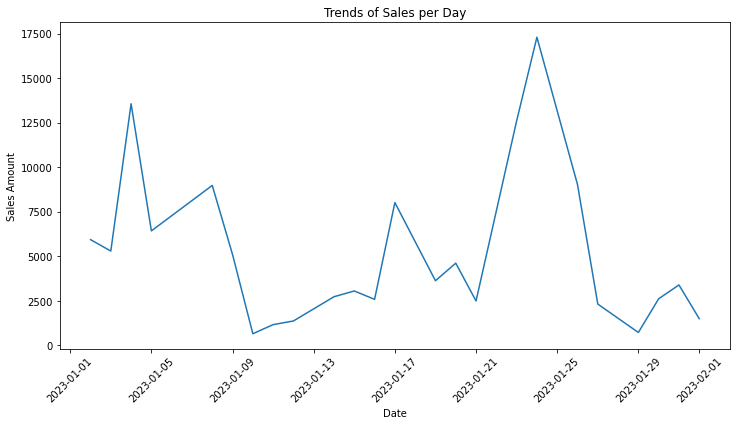

In [69]:
daily_sales = combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()


matplotlib.rcParams['figure.figsize']=(12,6)
plt.plot(daily_sales['date'], daily_sales['item payment amount(INR) '])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Trends of Sales per Day')
plt.xticks(rotation=45)
plt.show()

In [70]:
combined_data_payment_completed['date']

0     2023-01-02
1     2023-01-02
2     2023-01-02
3     2023-01-02
4     2023-01-02
         ...    
446   2023-01-30
447   2023-01-30
448   2023-01-30
449   2023-01-30
450   2023-01-30
Name: date, Length: 451, dtype: datetime64[ns]

<Figure size 1440x2160 with 0 Axes>

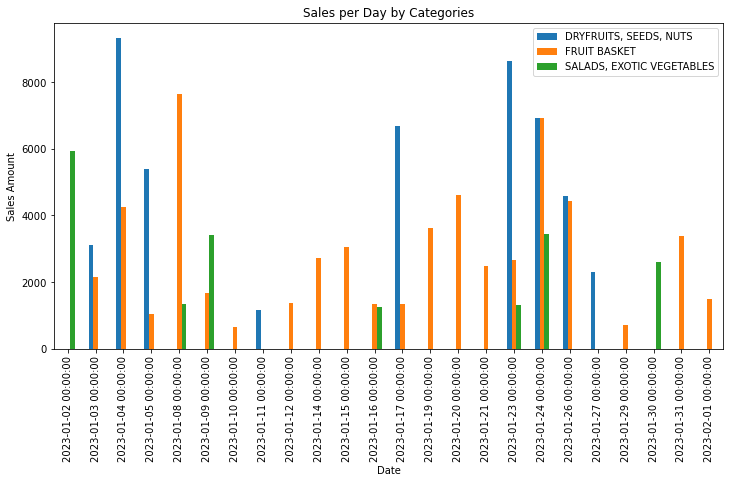

In [71]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item payment amount(INR) '].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item payment amount(INR) ')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()


this trend shows that on 21 june sales where heighest and fruit baskets where sold the most

<Figure size 1440x2160 with 0 Axes>

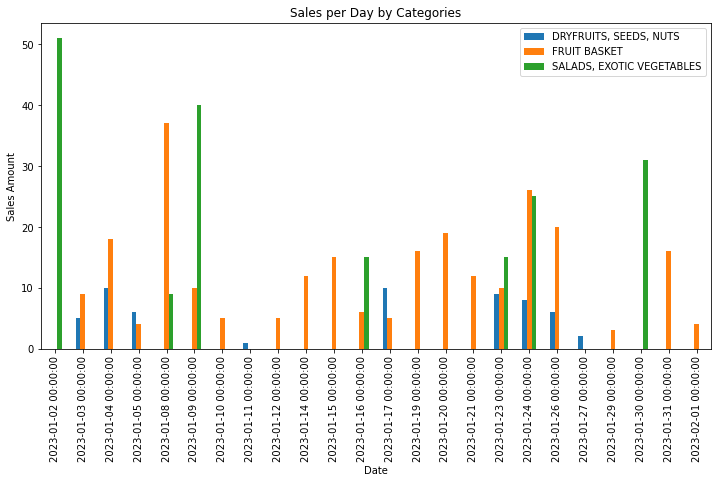

In [72]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item quantity'].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item quantity')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()

This trend shows that on 15 june vegetables where sold in heighest quantity

### Dryfruits

In [73]:
pd.set_option('display.max_colwidth', 200)

In [74]:
dryfruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='DRYFRUITS, SEEDS, NUTS']
dryfruits_grouped=dryfruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()


In [75]:
dryfruits_unique_names=dryfruits.groupby('item name')['name'].unique().reset_index()

dryfruits_unique=dryfruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(dryfruits_unique,dryfruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,dryfruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount(INR) ','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount(INR),item sales quantity,buyers Name
0,a2 gir cow ghee 500ml,1,1050.0,1.0,[namita sahni]
1,brazil nuts 200g,2,1120.0,2.0,"[amirbanu virji, namita sahni]"
2,cashews 500g,5,4100.0,5.0,"[amirbanu virji, indrani jafar, namita sahni, ami gumashta, yogesh thakkar]"
3,dried cranberries 500g,2,1900.0,2.0,"[yogesh thakkar, dinmeher bunshah]"
4,golden rasins 500g,2,1000.0,2.0,"[yogesh thakkar, jasma kapadia]"
5,honey awla 500g,3,1080.0,3.0,"[yogesh thakkar, michelle baptist, ami gumashta]"
6,jumbo anjeer 500g,3,2970.0,3.0,"[yogesh thakkar, jasma kapadia, brinda upadhyaya]"
7,macadamia nuts 200g,1,925.0,1.0,[michelle baptist]
8,makhana 250g,2,975.0,3.0,"[yogesh thakkar, indrani jafar]"
9,mamra badam 500g,4,7120.0,4.0,"[dinmeher bunshah, indrani jafar, namita sahni, ami gumashta]"


Table shows information regarding dry fruits categories item name,buyers count,sales amount,item sales quantity,buyers Name

In [76]:
dryfruit_date=dryfruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_dryfruits=dryfruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(dryfruit_date,unique_dryfruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
1,2023-01-04,9320.0,"[mamra badam 500g, plain pista 500g, cashews 500g, brazil nuts 200g, prunes 250g, pecan nuts 200g, walnuts 500g, premium almonds 500g, dried cranberries 500g]"
5,2023-01-23,8620.0,"[macadamia nuts 200g, premium jumbo dates 500g, walnuts 500g, honey awla 500g, brazil nuts 200g, a2 gir cow ghee 500ml, cashews 500g, mamra badam 500g]"
6,2023-01-24,6925.0,"[turkish apricot 200g, walnuts 500g, mixed seeds 250g, honey awla 500g, mamra badam 500g, cashews 500g, jumbo anjeer 500g]"
4,2023-01-17,6680.0,"[premium almonds 500g, prunes 250g, jumbo anjeer 500g, golden rasins 500g, turkish apricot 200g, walnuts 500g]"
2,2023-01-05,5390.0,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
7,2023-01-26,4590.0,"[walnuts 500g, premium jumbo dates 500g, prunes 250g, mixed seeds 250g, cashews 500g]"
0,2023-01-03,3125.0,"[dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g, honey awla 500g, makhana 250g]"
8,2023-01-27,2310.0,[walnuts 500g]
3,2023-01-11,1155.0,[walnuts 500g]


Dryfruits sales this month

### Fruits

In [77]:
fruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='FRUIT BASKET']
fruits_grouped=fruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

fruits_unique_names=fruits.groupby('item name')['name'].unique().reset_index()

fruits_unique=fruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(fruits_unique,fruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,fruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,6,7200.0,11.0,"[naina, yogesh thakkar, parul kumar, gayathri, jasma kapadia, dinmeher bunshah, nan]"
1,beauty pear 1kg,5,2400.0,8.0,"[parul kumar, indrani jafar, anubha, jasma kapadia, dinmeher bunshah]"
2,blueberries 2 box,11,9000.0,15.0,"[jaishankar vg, jasma kapadia, rachna jain, anubha, toral patel, gayathri, ushma, indrani jafar, simeen oshidar, dinmeher bunshah, asha gopalakrishnan, nan]"
3,delivery,20,555.0,37.0,"[naina, jaishankar vg, yogesh thakkar, jasma kapadia, rachna jain, mridula gupta, anubha, parul kumar, michelle baptist, kanchan samtani, toral patel, sonavi desai, indrani jafar, shwetha kallaje,..."
4,desi papaya 1pc,7,2100.0,21.0,"[naina, mridula gupta, parul kumar, sonavi desai, shwetha kallaje, ushma, dinmeher bunshah]"
5,elaichi banana 1dozen,3,472.0,4.0,"[parul kumar, dinmeher bunshah, naina]"
6,indian apples 1kg,5,1920.0,8.0,"[naina, mridula gupta, gayathri, dinmeher bunshah, yogesh thakkar]"
7,kiwi box,7,2600.0,13.0,"[jasma kapadia, rachna jain, anubha, toral patel, smita vats sharma, gayathri, dinmeher bunshah]"
8,malta oranges 1kg,8,1776.0,12.0,"[yogesh thakkar, anubha, toral patel, gayathri, sonavi desai, naina, dinmeher bunshah, asha gopalakrishnan]"
9,mosumbi local 1kg,5,1485.0,9.0,"[yogesh thakkar, mridula gupta, gayathri, kanchan samtani, dinmeher bunshah]"


In [78]:
fruits_date=fruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_fruits=fruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(fruits_date,unique_fruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
3,2023-01-08,7636.0,"[raipur guava 1kg, mosumbi local 1kg, desi papaya 1pc, strawberries 1 box, nagpur oranges 1kg, delivery, indian apples 1kg, pomegranate 1kg, blueberries 2 box, malta oranges 1kg, kiwi box, new zea..."
15,2023-01-24,6931.0,"[new zealand queen apples 1kg, delivery, blueberries 2 box, beauty pear 1kg, avocados 2 pcs, kiwi box, pineapple, red grapes 500g, watermelon, elaichi banana 1dozen, desi papaya 1pc, regular banan..."
12,2023-01-20,4608.0,"[elaichi banana 1dozen, beauty pear 1kg, pomegranate 1kg, sitafal 1kg, new zealand queen apples 1kg, avocados 2 pcs, raipur guava 1kg, delivery, desi papaya 1pc, kiwi box, strawberries 1 box]"
16,2023-01-26,4434.0,"[muskmelon 1pc, desi papaya 1pc, delivery, new zealand queen apples 1kg, strawberries 1 box, malta oranges 1kg, avocados 2 pcs, indian apples 1kg, red grapes 500g, sitafal 1kg, mosumbi local 1kg, ..."
1,2023-01-04,4240.0,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, blueberries 2 box, kiwi box, muskmelon 1pc]"
11,2023-01-19,3621.0,"[mosumbi local 1kg, indian apples 1kg, malta oranges 1kg, strawberries 1 box, delivery, avocados 2 pcs, kiwi box, pomegranate 1kg, sitafal 1kg, blueberries 2 box, desi papaya 1pc, regular banana 1..."
18,2023-01-31,3384.0,"[indian apples 1kg, watermelon, elaichi banana 1dozen, avocados 2 pcs, strawberries 1 box, pomegranate 1kg, malta oranges 1kg, delivery, desi papaya 1pc, red grapes 500g, new zealand queen apples ..."
8,2023-01-15,3045.0,"[sitafal 1kg, strawberries 1 box, delivery, kiwi box, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, watermelon, desi papaya 1pc, regular banana 1 doz, indian apples 1kg]"
7,2023-01-14,2723.0,"[beauty pear 1kg, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, delivery, desi papaya 1pc, avocados 2 pcs, new zealand queen apples 1kg]"
14,2023-01-23,2660.0,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g, pomegranate 1kg]"


### Vegetables

In [79]:
Vegetables=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='VEGETABLES']
Vegetables_grouped=Vegetables.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

Vegetables_unique_names=Vegetables.groupby('item name')['name'].unique().reset_index()

Vegetables_unique=Vegetables.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(Vegetables_unique,Vegetables_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,Vegetables_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,buyers count,sales amount,item sales quantity,item name,buyers Name


In [80]:
Vegetables_date=Vegetables.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_Vegetables=Vegetables.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(Vegetables_date,unique_Vegetables, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,item payment amount(INR),date,item name


### Exotic vegetables

In [81]:
exotic_vegies=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='SALADS, EXOTIC VEGETABLES']
exotic_vegies_grouped=exotic_vegies.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

exotic_vegies_unique_names=exotic_vegies.groupby('item name')['name'].unique().reset_index()

exotic_vegies_unique=exotic_vegies.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(exotic_vegies_unique,exotic_vegies_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,exotic_vegies_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,4,2550.0,4.0,"[kanchan samtani, indrani jafar, toral patel, dinmeher bunshah]"
1,baby spinach,4,660.0,6.0,"[indrani jafar, shradha goenka, parvin dumasia, dinmeher bunshah]"
2,babybella mushroom 2packs,3,525.0,3.0,"[toral patel, dinmeher bunshah, kerbi patel]"
3,babycorn 1pack,4,390.0,6.0,"[trupti, michelle baptist, dinmeher bunshah, ashish billimoria]"
4,broccoli 1pc,7,680.0,8.0,"[kerbi patel, jasma kapadia, indrani jafar, naina, shradha goenka, madhu, dinmeher bunshah]"
5,button white mushroom 2packs,4,700.0,5.0,"[jasma kapadia, michelle baptist, dinmeher bunshah, naina]"
6,celery 250g,4,280.0,4.0,"[trupti, naina, dinmeher bunshah, kerbi patel]"
7,cherry tomatoes 250g,7,850.0,10.0,"[kanchan samtani, indrani jafar, naina, shradha goenka, toral patel, parvin dumasia, dinmeher bunshah]"
8,delivery,16,495.0,33.0,"[kerbi patel, trupti, kanchan samtani, meenal, ashish billimoria, jasma kapadia, dinmeher bunshah, michelle baptist, indrani jafar, abha mehta, naina, shradha goenka, madhu, toral patel, parvin du..."
9,green zucchini 1pc,2,170.0,2.0,"[dinmeher bunshah, ashish billimoria]"


In [82]:
exotic_vegies_date=exotic_vegies.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_exotic_vegies=exotic_vegies.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(exotic_vegies_date,unique_exotic_vegies, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
0,2023-01-02,5930.0,"[broccoli 1pc, delivery, purple cabbage 1 pc, s romaine, red yellow capsicum 1pc, s swiss chard, s curl kale, s spicy mix, imported blueberries 2punnets, iceberg lettuce 1 pc, celery 250g, babycor..."
5,2023-01-24,3443.0,"[purple cabbage 1 pc, japanese cucumber 500g, green zucchini 1pc, s lettuce mix, yellow zucchini 1pc, s aragula, s curl kale, s summercrisp, delivery, cherry tomatoes 250g, s spicy mix, italian ba..."
2,2023-01-09,3405.0,"[s summercrisp, s butterhead, button white mushroom 2packs, italian basil, delivery, s spicy mix, s lettuce mix, cherry tomatoes 250g, red yellow capsicum 1pc, broccoli 1pc, celery 250g, baby spin..."
6,2023-01-30,2608.0,"[babycorn 1pack, s butterhead, s summercrisp, delivery, japanese cucumber 500g, celery 250g, s curl kale, s swiss chard, red yellow capsicum 1pc, babybella mushroom 2packs, s aragula, iceberg lett..."
1,2023-01-08,1338.0,"[cherry tomatoes 250g, red yellow capsicum 1pc, avocados 2 pcs, iceberg lettuce 1 pc, purple cabbage 1 pc, babybella mushroom 2packs, delivery, italian basil]"
4,2023-01-23,1315.0,"[delivery, s lettuce mix, s aragula, cherry tomatoes 250g, baby spinach, s romaine]"
3,2023-01-16,1245.0,"[baby spinach, cherry tomatoes 250g, s aragula, s spicy mix, delivery, s romaine, s lettuce mix, s summercrisp, s butterhead]"


In [83]:
combined_data_payment_completed['name'].unique()

array(['kerbi patel', 'trupti', 'kanchan samtani', 'meenal',
       'ashish billimoria', 'jasma kapadia', 'dinmeher bunshah',
       'michelle baptist', 'indrani jafar', 'naina', 'jaishankar vg',
       'yogesh thakkar', 'rachna jain', 'amirbanu virji', 'mridula gupta',
       'anubha', 'parul kumar', 'toral patel', 'sonavi desai',
       'shwetha kallaje', 'abha mehta', 'shradha goenka', 'madhu',
       'namita sahni', 'ami gumashta', 'brinda upadhyaya',
       'smita vats sharma', 'gayathri', 'ushma', 'parvin dumasia',
       'meher mirza', 'simeen oshidar', 'asha gopalakrishnan', nan],
      dtype=object)

#### Indrani's data 

In [84]:
indrani_data=combined_data_payment_completed[combined_data_payment_completed['name']=='indrani jafar']
indrani_data_grouped=indrani_data.groupby('item name')['item quantity','item payment amount(INR) '].sum().reset_index()
indrani_data_grouped.sort_values(by='item payment amount(INR) ',ascending=False)

,item name,item quantity,item payment amount(INR)
10,mamra badam 500g,1.0,1780.0
20,salted pista 500g,1.0,1450.0
5,cashews 500g,1.0,820.0
0,avocados 2 pcs,1.0,700.0
12,pine nuts 100g,1.0,690.0
9,makhana 250g,2.0,650.0
21,strawberries 1 box,3.0,615.0
3,blueberries 2 box,1.0,600.0
8,japanese cucumber 500g,4.0,320.0
2,beauty pear 1kg,1.0,300.0


In [85]:
indrani_orders = combined_data_payment_completed[(combined_data_payment_completed['name'] == 'indrani jafar')]



indrani_order_dates = indrani_orders.groupby('date')['item name'].unique().reset_index()
indrani_order_dates

,date,item name
0,2023-01-02,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g]"
1,2023-01-05,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
2,2023-01-09,"[beauty pear 1kg, delivery, strawberries 1 box, nagpur oranges 1kg, raipur guava 1kg, broccoli 1pc, baby spinach, s romaine, s aragula, purple cabbage 1 pc, s butterhead, red yellow capsicum 1pc, ..."
3,2023-01-23,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g]"


In [86]:
combined_data_payment_completed[combined_data_payment_completed['name']=='yogesh thakkar']

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,email,date,time,year,day,month,name
60,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,strawberries 1 box,215.0,2.0,430.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
61,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,delivery,15.0,1.0,15.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
62,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,sitafal 1kg,260.0,1.0,260.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
63,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,mosumbi local 1kg,165.0,1.0,165.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
64,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,avocados 2 pcs,650.0,1.0,650.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
65,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,pomegranate 1kg,350.0,1.0,350.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
66,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,nagpur oranges 1kg,145.0,1.0,145.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
67,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,malta oranges 1kg,148.0,1.0,148.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
85,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,dried cranberries 500g,950.0,1.0,950.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar
86,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,golden rasins 500g,500.0,1.0,500.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar


# END